In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
X,y=make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

<Axes: >

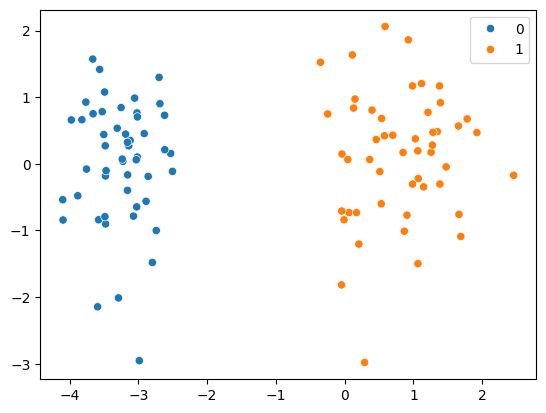

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [8]:
lor=LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
x_input=np.linspace(-3,3,100)
y_input=m1*x_input+b1

In [11]:
def gd(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.5
    for i in range(5000):
        y_hat=sigmoid(X@weights)
        weights=weights+lr*((y-y_hat)@X)/X.shape[0]
    return weights[1:],weights[0]

def sigmoid(z):
    return 1/(1+np.exp(-z))


In [12]:
coef_,intercept_ = gd(X,y)

In [14]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [15]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

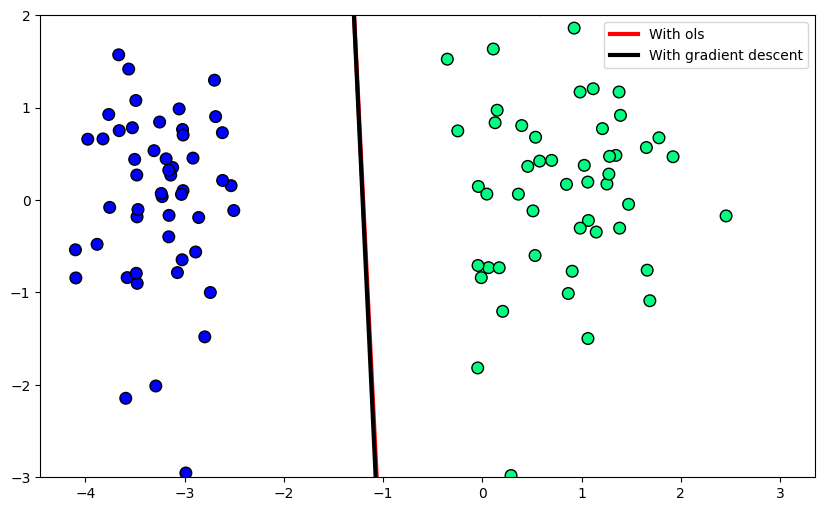

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='With ols')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='With gradient descent')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=70,edgecolors='black')
plt.ylim(-3,2)
plt.legend()